# %% LE PLAN

'''
    1. df reorganisation (factorial) and creation of ratios
    2. calculate and save to table average, SD and SEM
    3. ShapiroWilk test for normailty (note if not noirmal) and statistical analysis
    4. plot histograms with SEM and ** for each treatment, compound and BR
    5. test normaility for correlation if normal : 
                                                    --> pearson product coirrelation plots 
                            non-parametric data :
                                                    --> spearman coirrelation plots      
                                                    
            produced for each BR comparing compunds and compound comparing BR
    6. PCA for  complete compound_BR/ ratio_BR sets between groups 


'''

Imports and Constants:

Import module HPLC_MODULE_NOTEBOOK

Set filename to .csv with data structure
            'mouse_no' 'group_no' 'compound_BR'
                1           2           ng_mg

Set 
    treatment_mapping: 'string' corresponging to each group_no /treatment_group
    compound_ratio_mapping: dictionary of the ratios of interest 
    palette_labeled: colour palette mapping 'strings' to colour

In [1]:
from HPLC_MODULE_NOTEBOOK import * #Must be reimported when changes made to module file


treatment_mapping = { #TO DO : change name to treatment_info and add columns in df REMI
    1: {'treatment': 'vehicles', 'color': "white", 'experiments': ['dose_response','agonist_antagonist']},
    2: {'treatment': '10mg/kgTCB', 'color': "firebrick", 'experiments': ['dose_response']},
    3: {'treatment': '3mg/kgTCB', 'color': "red", 'experiments': ['dose_response','agonist_antagonist']},
    4: {'treatment': '0.3mg/kgTCB', 'color': "salmon", 'experiments': ['dose_response']},
    5: {'treatment': 'TCB+MDL', 'color': "grey", 'experiments': ['agonist_antagonist']},
    6: {'treatment': '0.2mg/kgMDL', 'color': "black", 'experiments': ['agonist_antagonist']}
    } 
compound_ratio_mapping = {'DOPAC': ['DA'],     
                       '5HIAA': ['5HT'],
                       '3MT': ['DA'],
                       'HVA': ['DA', '3MT', 'DOPAC'],
                       'GLN': ['GLU']}

experimental_info = {'dose_response': {'groups':[1,2,3,4], 'independant_var': ['TCB2']}, 
                     'agonist_antagonist':{'groups':[1,3,5,6], 'independant_var': ['TCB2', 'MDL']}}

# treatment_mapping = {1: 'vehicles', 2: '10mg/kgTCB', 3: '3mg/kgTCB',
#                   4: '0.3mg/kgTCB', 5: 'TCB+MDL', 6: '0.2mg/kgMDL'} 

# palette_labeled = {'vehicles': "white",  # TCB2
#                    '10mg/kgTCB': "firebrick",
#                    '3mg/kgTCB': "red",
#                    '0.3mg/kgTCB': "salmon",
#                    'TCB+MDL': "grey",
#                    '0.2mg/kgMDL': "black"}
filename = 'TCB2_data_APRIL23.csv'  # TCB2 #using current working directory plus file name 
saveMetadata(filename, treatment_mapping, experimental_info)
#getAndPlotMultipleCorrelograms(filename, {'compound':['DA', 'NA', '5HT-DA'], 'region':['CC', 'CC-IC'], 'experiment': 'dose_response'}, p_value_threshold=0.05, n_minimum=5, from_scratch=False)

# getAndPlotSingleCorrelogram(filename, p_value_threshold=0.05, n_minimum=5) #This is the user friendly version with prompt
# getAndPlotSingleCorrelogram(filename, experiment='dose_response', correlogram_type='compound', to_correlate='DA', p_value_threshold=0.05, n_minimum=5) #This is to save time and skip the prompt


TREATMENT MAPPING {1: {'treatment': 'vehicles', 'color': 'white', 'experiments': ['dose_response', 'agonist_antagonist']}, 2: {'treatment': '10mg/kgTCB', 'color': 'firebrick', 'experiments': ['dose_response']}, 3: {'treatment': '3mg/kgTCB', 'color': 'red', 'experiments': ['dose_response', 'agonist_antagonist']}, 4: {'treatment': '0.3mg/kgTCB', 'color': 'salmon', 'experiments': ['dose_response']}, 5: {'treatment': 'TCB+MDL', 'color': 'grey', 'experiments': ['agonist_antagonist']}, 6: {'treatment': '0.2mg/kgMDL', 'color': 'black', 'experiments': ['agonist_antagonist']}} SAVED TO /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_APRIL23 SUBCACHE
EXPERIMENTAL INFO {'dose_response': {'groups': [1, 2, 3, 4], 'independant_var': ['TCB2']}, 'agonist_antagonist': {'groups': [1, 3, 5, 6], 'independant_var': ['TCB2', 'MDL']}} SAVED TO /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_APRIL23 SUBCACHE


Outliers: 

In [ ]:
#exclusion of outliers Grubbs test or Rout: to be done for each group i.e. BR, compound, treatment(group) RATIOS and nm_mg seperatly
    #select method: Grubbs
    #propose outliers and show on plot with group: 
    #accept or reject 
    #modity df and save something indicating removed data 

#REMI: for now I am jus not doing this as it feels complicated
#from outliers import smirnov_grubbs as grubbs
#x_ = grubbs.test(x, alpha=p_value)

Aggregate Stats:
    build a df with the shapiro_F, shapiro_p, mean, SD, SEM, list of values(good for hist plotting)

In [2]:


getCompoundDf(filename) #display aggregate stats 

#normality testing: shapiro wilk
    #display what % of data sets (i.e. BR, compound, treatment(group)) are normal
    #chose to go parametric or non from here (all data treated same)
    #set in dict of stuffs.... 

GETTING "compound_df" FROM "TCB2_data_APRIL23" CACHE


,mouse_id,treatment,BR,compound,ng_mg
0,2,vehicles,OF,LDOPA,0.038630
1,2,vehicles,OF,NA,0.163797
2,2,vehicles,OF,A,0.004028
3,2,vehicles,OF,5HTP,0.007148
4,2,vehicles,OF,DOPAC,0.018343
...,...,...,...,...,...
15984,70,10mg/kgTCB,CE,DOPAC,0.029512
15985,70,10mg/kgTCB,CE,DA,0.026709
15986,70,10mg/kgTCB,CE,5HIAA,0.074892
15987,70,10mg/kgTCB,CE,HVA,0.035113


In [4]:
#Quantitative Analysis 
#reference for stats: https://www.statology.org/tukey-test-python/

#remi: here i need to build in flexable stats structure
#group to compare: if data conatins multiple experiments then there may be groupings i.e. doese/responce and agonist/antagonist
#normailty: nomal/parametric or not
#independant vairables (factor): i.e. k=2 (this will belong to each experiment or grouping)
        #dose responce data (single factor k=1) --> one way ANOVA --> post hoc Tukey 
        #agonist antagonist data ( k=2) --> two way ANOVA --> one way ANOVA --> post hoc Tukey
        #(multi factor k=3)repeated measures ANOVA 
#post hoc: tukey 
#significance plotted: e.g. tukey after passing BOTH one and two way ANOVA or all one way ANOVA tukey 


# #oneway (df, group_to_compare):
# #inputs: array like groups e.g. group1,group2,group3,group4
# #outputs two floats : F_value, p_value 
# #if p<0.05 the two groups do not have the same population mean 
# F_value, p_value = scipy.stats.f_oneway(group1,group2,group3,group4)

# #two way anova (df, group_to_compare):
# #inputs: df, dv='ng_mg', between= [factor_1, factor_2] #the factors should be boolian columns i.e. TCB2 = T/F and MDL = T/F
# #outputs: df see https://pingouin-stats.org/build/html/generated/pingouin.anova.html
#         # 	Source	SS	DF	MS	F	p-unc	np2
#         # 0	ANT_MDL	0.001	1	0.001	0.053	0.819	0.001
#         # 1	AG_TCB2	0.007	1	0.007	0.671	0.418	0.017
#         # 2	ANT_MDL * AG_TCB2	0.012	1	0.012	1.123	0.296	0.028
#         # 3	Residual	0.415	39	0.011			

# two_way_anova = pg.anova(data=df_anova_working, dv='dv', between=[
#                                       ('ANT_MDL'), ('AG_TCB2')], detailed=True).round(3)

# #tukey  --- post hoc DONE ON SITE AFTER ONE AND TWO WAY ARE IN DF to plot
# #input df'ng_mg', df'grouping'
# mc = MultiComparison(
#     df_dose_responce[comp, BR], df_dose_responce['group', 'no'])
# mc_results = mc.tukeyhsd()




# #old df structure for input to two way ANOVA
# d = {'dv': df_factors[comp, BR][indexes_to_keep], 'ANT_MDL': df_factors['ANT', 'MDL'][indexes_to_keep],
#                   'AG_TCB2': df_factors['AG', 'TCB2'][indexes_to_keep], 'group': df_factors['group', 'no'][indexes_to_keep]}
            




#histograms with stats plotted (idealy chosing the level of stats i.e. significance in two way ANOVA and one way ANOVA )

getAggregateStatsDf(filename,df_type='compound')

BUILDING "compound_aggregate_stats"
GETTING "compound_df" FROM "TCB2_data_APRIL23" CACHE


/Users/jasminebutler/Desktop/phd/.venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


CREATED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_APRIL23/compound_aggregate_stats.pkl CACHE


,treatment,region,compound,shapiro_F,shapiro_p,is_valid,mean,std,sem,values
0,0.2mg/kgMDL,AC,5HIAA,0.931388,0.461682,True,0.116859,0.036906,0.011671,"[0.129558874, 0.103243639, 0.137603989, 0.0736..."
1,0.2mg/kgMDL,AC,5HT,0.980960,0.970100,True,0.099423,0.025240,0.007981,"[0.121272649, 0.092282145, 0.083923844, 0.0579..."
2,0.2mg/kgMDL,AC,5HTP,0.592687,0.000045,True,0.039143,0.062978,0.019915,"[0.017717292, 0.003593031, 0.013304998, 0.0129..."
3,0.2mg/kgMDL,AC,A,0.864360,0.085876,True,0.002212,0.002081,0.000658,"[0.003197882, 0.000260697, 0.003253498, 0.0012..."
4,0.2mg/kgMDL,AC,ALA,0.941838,0.573636,True,39.520359,10.047596,3.177329,"[34.43540514, 51.0982753, 53.46436707, 37.4013..."
...,...,...,...,...,...,...,...,...,...,...
3907,vehicles,vH,LSER,0.820411,0.001063,True,47.996985,19.768975,4.214760,"[72.36113476, 72.36113476, 46.51357707, 46.513..."
3908,vehicles,vH,NA,0.922750,0.086686,True,0.232054,0.041252,0.008795,"[0.218822744, 0.218822744, 0.221792856, 0.2217..."
3909,vehicles,vH,TAU,0.882603,0.013550,True,475.116293,177.306597,37.801893,"[720.2194902, 720.2194902, 486.7247508, 486.72..."
3910,vehicles,vH,THR,0.821384,0.001103,True,17.937869,7.155966,1.525657,"[28.51172535, 28.51172535, 16.52169516, 16.521..."


Qualitative / Correlations:

    clasical_corellogram                            #cell bellow is the first functioning draft of this for within compound
                                                    #needs to be modularised and have inputs n_minimum, p_val, BR_column_order, compounds_of_interest 
                                                    #I would sugest we have a BR and a compound input to the function to chose which to look at and maybe a generate and save all option if needed
        within BR       /       within compound

    bar_corellogram
                                                    #see whatsapp image 3/5/23
        within BR       /       within compound

    square_correlogram
        within BR       /       within compound


In [ ]:
#within a BR between compounds
# for treatment_BR, treatment_BR_groupby_df in df.groupby(by =['treatment', 'BR']):
#     print(treatment_BR_groupby_df)
    #create corr_df with a column for each compound beloning to the group

##REMI: I believe we could be smart and have one series of modular functions that does both... thoughts?
# Also wahat do I do with the figures I generate? they are too much to be spat out of a cell and need to be organised in a way that makes sense... a df of figures?

GETTING "dose_response_for_5HT_in_CC" FROM "TCB2_data_APRIL23" CACHE


/Users/jasminebutler/Desktop/phd/HPLC_MODULE_NOTEBOOK.py:367: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


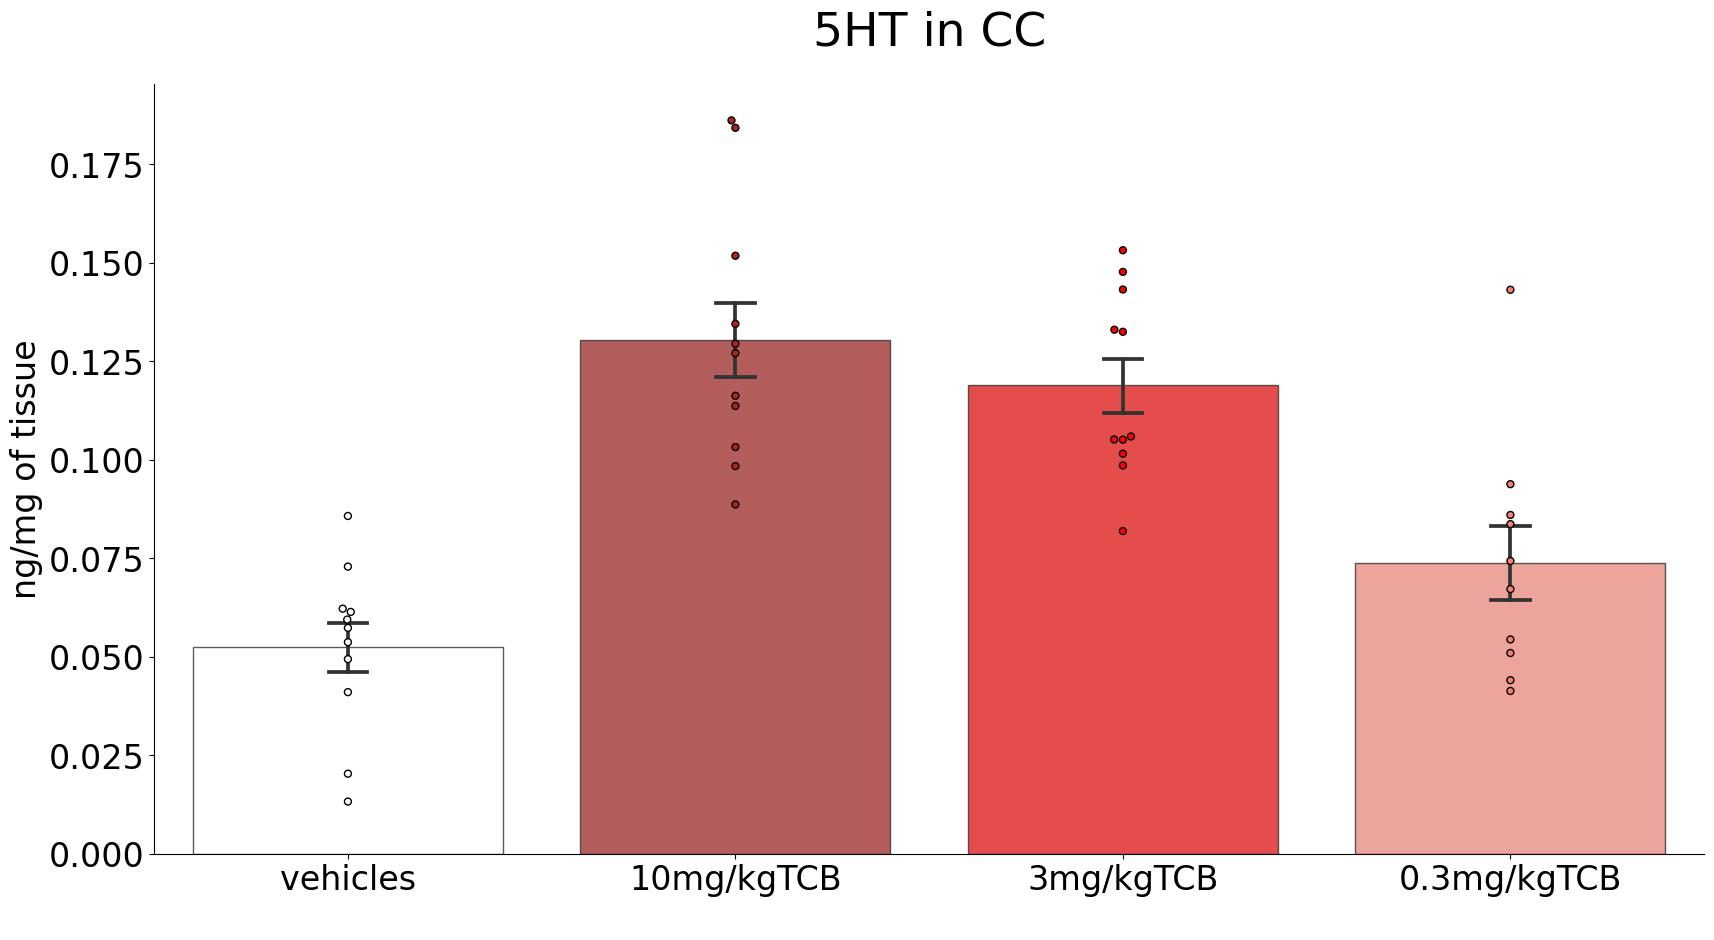

In [4]:

getSingleHistogram(filename, 'dose_response', '5HT', 'CC', 0.05, from_scratch = False)

# buildSingleHistogram(filename, 'dose_response', '5HT', 'CC', 0.05)